In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import fastf1 as ff
import fastf1.plotting as ffp

In [36]:
ff.Cache.enable_cache('./cache')

In [43]:
# load the race session
session = ff.get_session(2025, 'Bahrain', 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 63: Lap timing integrity check failed for 3 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '

    Now i'm gonna get all the laps details for the point finishers only

In [44]:
point_finishers = session.drivers[:10]
print(point_finishers)

['81', '63', '4', '16', '44', '1', '10', '31', '22', '87']


In [45]:
driver_laps = session.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

In [47]:
driver_laps.shape

(502, 32)

In [46]:
driver_laps.head()

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0,0 days 00:57:13.827000,PIA,81,0 days 00:01:38.693000,1.0,1.0,NaT,NaT,NaT,...,False,McLaren,0 days 00:55:34.907000,2025-04-13 15:03:49.174,1,1.0,False,,False,False
1,1,0 days 00:58:51.319000,PIA,81,0 days 00:01:37.492000,2.0,1.0,NaT,NaT,0 days 00:00:31.139000,...,False,McLaren,0 days 00:57:13.827000,2025-04-13 15:05:28.094,1,1.0,False,,False,True
2,2,0 days 01:00:29.402000,PIA,81,0 days 00:01:38.083000,3.0,1.0,NaT,NaT,0 days 00:00:31.306000,...,False,McLaren,0 days 00:58:51.319000,2025-04-13 15:07:05.586,1,1.0,False,,False,True
3,3,0 days 01:02:07.535000,PIA,81,0 days 00:01:38.133000,4.0,1.0,NaT,NaT,0 days 00:00:31.326000,...,False,McLaren,0 days 01:00:29.402000,2025-04-13 15:08:43.669,1,1.0,False,,False,True
4,4,0 days 01:03:45.578000,PIA,81,0 days 00:01:38.043000,5.0,1.0,NaT,NaT,0 days 00:00:31.305000,...,False,McLaren,0 days 01:02:07.535000,2025-04-13 15:10:21.802,1,1.0,False,,False,True


In [49]:
finishing_order = [session.get_driver(i)['Abbreviation'] for i in point_finishers]
print(finishing_order)

['PIA', 'RUS', 'NOR', 'LEC', 'HAM', 'VER', 'GAS', 'OCO', 'TSU', 'BEA']


In [56]:
driver_laps.columns

Index(['index', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate', 'LapTime(s)'],
      dtype='object')

<Axes: xlabel='Driver', ylabel='LapTime(s)'>

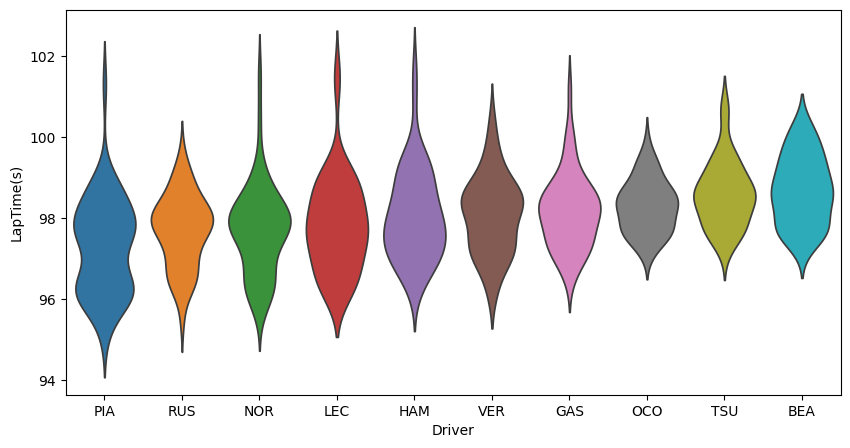

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(
    data=driver_laps,
    x="Driver",
    y="LapTime(s)",
    hue="Driver",
    density_norm="area",
    order=finishing_order,
    inner=None,
)